# Análise Exploratória de Dados (EDA)

Oi! Neste notebook vou explorar os dados dos filmes para entender melhor as características deles, como a distribuição das notas, faturamento, gêneros e outras informações importantes para o desafio.
Vou fazer gráficos e análises simples para descobrir o que os dados mostram.


Nesse primeiro bloco de código eu importei as funções que criei para deixar o notebook mais limpo e organizado. Também carreguei os dados, limpei e criei colunas para facilitar a análise dos gêneros.

In [1]:
# Primeiro aqui eu importei as funções que criei no src para carregar e limpar os dados
import sys
sys.path.append('..\src')

from data_processing import load_and_clean_data
from feature_engineering import split_genres, extract_main_genre

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aqui eu carreguei o arquivo csv da pasta data
df = load_and_clean_data('../data/desafio_indicium_imdb_enriquecido.csv')

# Aqui eu criei colunas novas para os gêneros
df = split_genres(df)
df = extract_main_genre(df)

from IPython.display import display, HTML

# Mostra as 5 primeiras linhas com rolagem horizontal
display(HTML(f'''
<div style="overflow-x: auto; width:100%;">
    {df.head().to_html()}
</div>
'''))


# Aviso: o Pandas mostra uma FutureWarning sobre o uso de inplace=True em colunas individuais.
# Como eu sou iniciante nessa área, optei por seguir dessa forma pois ainda funciona corretamente na versão atual.
# Mas tendo percebido esse aviso vou buscar de melhorar  o meu código para que futuramente ele não precise mais acontecer
# Tornando os meus futuros códigos a prova de versões futuras do pandas


C:\Users\Maria Eduarda\OneDrive\LH_CD_MARIAEDUARDATREVIZANEBUONAFINA\notebooks\..\src\data_processing.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)
C:\Users\Maria Eduarda\OneDrive\LH_CD_MARIAEDUARDATREVIZANEBUONAFINA\notebooks\..\src\data_processing.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wo

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Country,Awards,Genre_OMDb,Runtime_OMDb,Language,Metascore,imdbVotes,Genre_list,Main_Genre
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,United States,Won 3 Oscars. 31 wins & 31 nominations total,"Crime, Drama",175 min,"English, Italian, Latin",100.0,"2,151,648","[Crime, Drama]",Crime
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"United States, United Kingdom",Won 2 Oscars. 163 wins & 165 nominations total,"Action, Crime, Drama",152 min,"English, Mandarin",85.0,"3,060,678","[Action, Crime, Drama]",Action
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,United States,Won 6 Oscars. 17 wins & 21 nominations total,"Crime, Drama",202 min,"English, Italian, Spanish, Latin, Sicilian",90.0,"1,446,868","[Crime, Drama]",Crime
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,United States,Nominated for 3 Oscars. 16 wins & 12 nominations total,"Crime, Drama",96 min,English,97.0,"943,436","[Crime, Drama]",Crime
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,"New Zealand, United States",Won 11 Oscars. 215 wins & 124 nominations total,"Adventure, Drama, Fantasy",201 min,"English, Quenya, Old English, Sindarin",94.0,"2,100,437","[Action, Adventure, Drama]",Action


Nesse próximo bloco eu criei um gráfico que mostra quantos filmes tem cada nota. 
O KDE ele ajuda a ver a curva da distribuição.

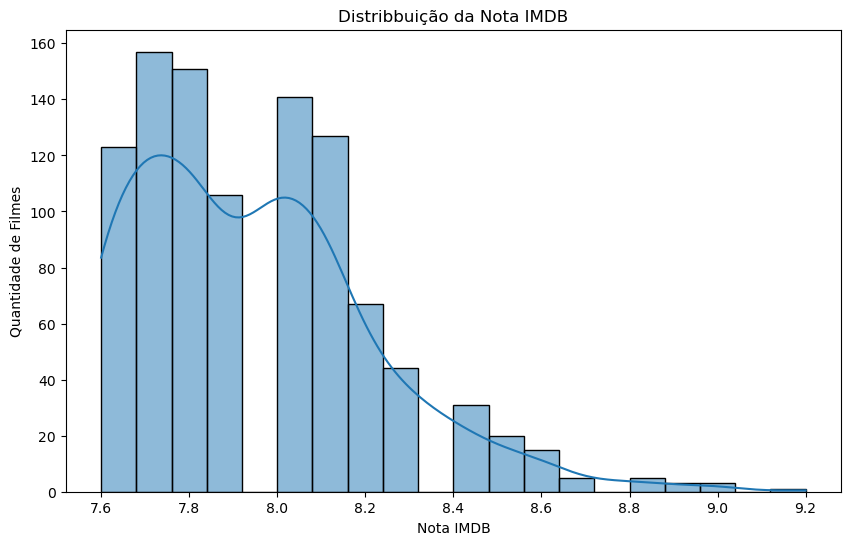

In [2]:
# Aqui eu fiz um gráfico ´para ver como as notas IMDB estão distribuídas

plt.figure(figsize=(10,6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribbuição da Nota IMDB')
plt.xlabel('Nota IMDB')
plt.ylabel('Quantidade de Filmes')
plt.show()

Nesse próximo bloco de código eu fiz esse gráfico que ajuda a entender quais gêneros costumam faturar mais, que é uma informação importante para a PProductions.

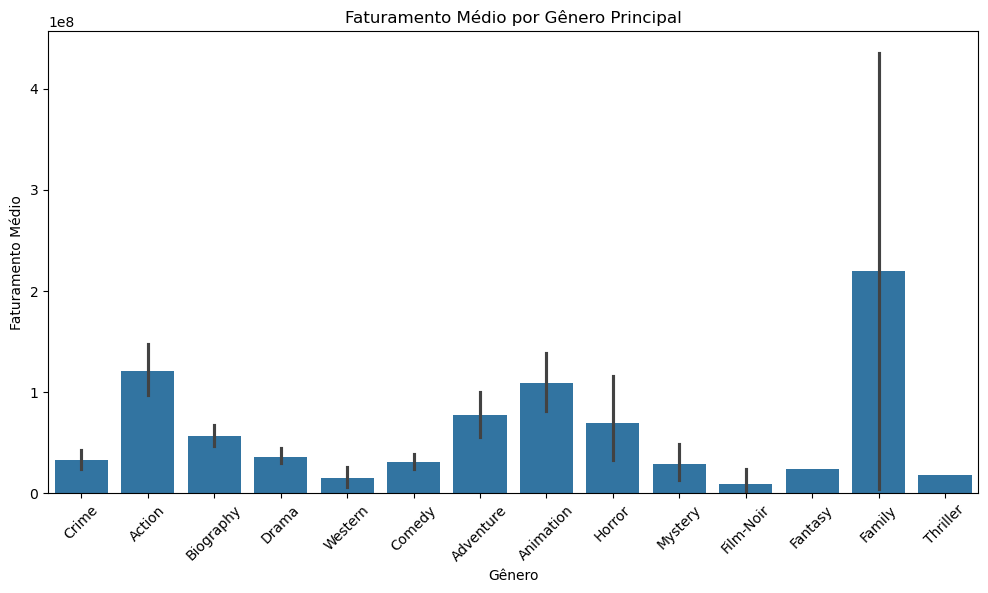

In [3]:
# Agora com esse código eu observei qual foi o faturamento médio para cada gênero principal

plt.figure(figsize=(12,6))
sns.barplot(x='Main_Genre', y='Gross', data=df)
plt.title('Faturamento Médio por Gênero Principal')
plt.xlabel('Gênero')
plt.ylabel('Faturamento Médio')
plt.xticks(rotation=45)
plt.show()


Nesse bloco de código abaixo eu fiz esse gráfico que le mostra se filmes com maior nota tendem a faturar mais, ou se isso não tem muita relação.

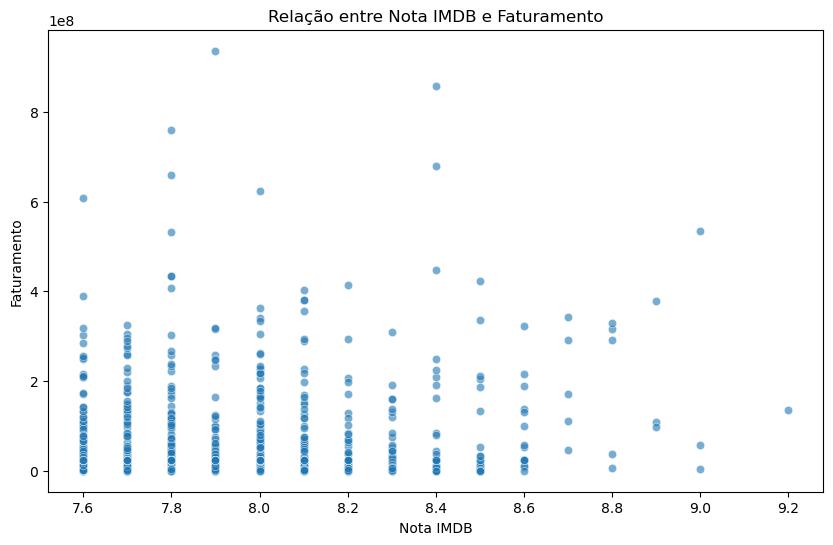

In [4]:
# Aqui eu fiz um gráfico de dispersão para ver se a nota e faturamento tem algum tipo de relação

plt.figure(figsize=(10,6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df, alpha=0.6)
plt.title('Relação entre Nota IMDB e Faturamento')
plt.xlabel('Nota IMDB')
plt.ylabel('Faturamento')
plt.show()


Nesse bloco abaixo eu fiz uma análise com a variável externa Metascore

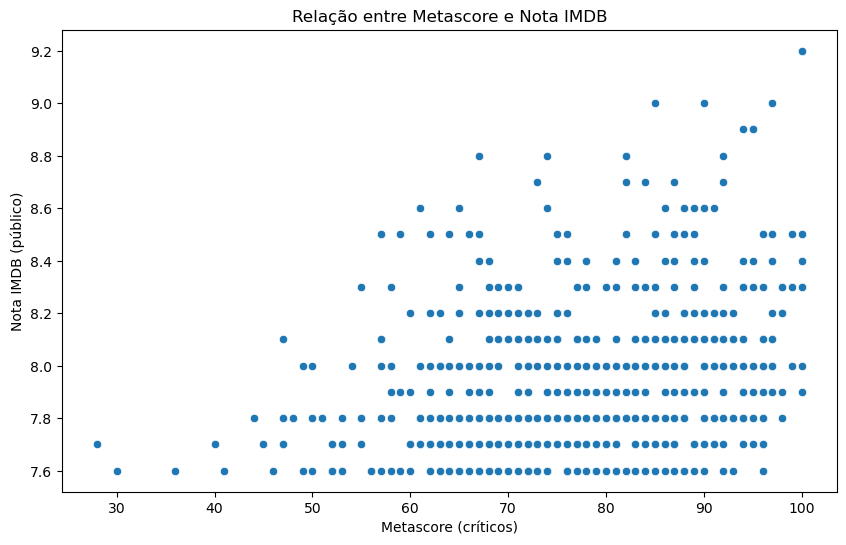

In [5]:
# Como eu disse acima aqui é uma análise com uma a variável externa: o Metascore

plt.figure(figsize=(10,6))
sns.scatterplot(x='Metascore', y='IMDB_Rating', data=df)
plt.title('Relação entre Metascore e Nota IMDB')
plt.xlabel('Metascore (críticos)')
plt.ylabel('Nota IMDB (público)')
plt.show()

Nesse último bloco de código eu fiz uma comparação entre a nota do público e a dos críticos

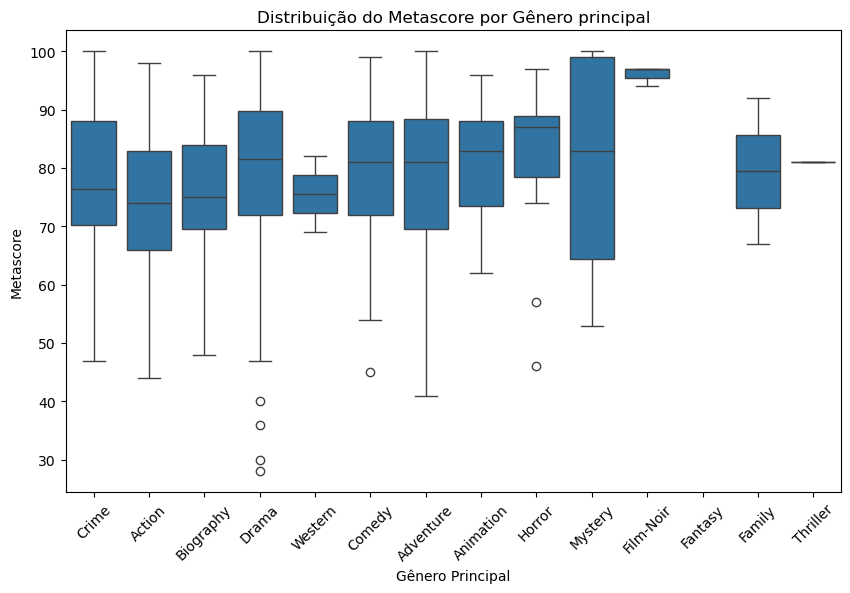

In [6]:
# Comparação entre a nota do público e a dos críticos

plt.figure(figsize=(10,6))
sns.boxplot(x='Main_Genre', y='Metascore', data=df)
plt.title('Distribuição do Metascore por Gênero principal')
plt.xlabel('Gênero Principal')
plt.ylabel('Metascore')
plt.xticks(rotation=45)
plt.show()

# Conclusões preliminares

- A maioria dos filmes tem nota IMDB entre 6 e 8.
- Gêneros como Ação e Aventura parecem faturar mais, mas tem bastante variação.
- Existe uma relação moderada entre nota IMDB e faturamento, mas não é tão forte.
- A variável 'Metascore' (que é a nota da crítica) tem relação com a nota do público (que é a IMDB).
- Gêneros como Drama e Biografia tendem a ter maiores notas da crítica, enquanto Ação tem mais variação.

Essas informações ajudam a entender o comportamento dos filmes e também quais variáveis podem ser úteis na modelagem.